Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('temperature.csv')

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.shape

(7752, 25)

Let's check the datatypes and null values:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


- We have lots of null values present in each columns.
- We have only one categorical column-"Date", which is not truly categorical as we'll convert it to datetime and extract day,month and year in separate columns to create plots with insights based on season and time.

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
sum=0
for i in df.columns:
    sum = sum + df[i].isnull().sum()
print(sum)

1248


__Null values percentage:__

In [16]:
percentage=round((sum/df.shape[0] *100),2)
print(f"Null values constitute {percentage} % of the whole dataframe")

Null values constitute 16.1 % of the whole dataframe


__So,it's better to impute these values after EDA, so we can get accurate information from the dataset, as imputed values tend to skew the data towards mean or mode somewhat.__

In [19]:
df["day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["month"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.month
df["year"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.year

df.drop(["Date"], axis = 1, inplace = True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


In [21]:
df.shape

(7752, 27)

In [20]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                 float64
month               float64
year                float64
dtype: object

In [53]:
for i in df.columns[-3:]:
    print(df[i].value_counts())

30.0    375
15.0    250
7.0     250
23.0    250
8.0     250
3.0     250
10.0    250
16.0    250
11.0    250
27.0    250
2.0     250
13.0    250
12.0    250
21.0    250
9.0     250
4.0     250
25.0    250
26.0    250
22.0    250
29.0    250
28.0    250
17.0    250
19.0    250
20.0    250
1.0     250
5.0     250
18.0    250
6.0     250
24.0    250
14.0    250
31.0    125
Name: day, dtype: int64
7.0    3875
8.0    3750
6.0     125
Name: month, dtype: int64
2015.0    1550
2014.0    1550
2013.0    1550
2016.0    1550
2017.0    1550
Name: year, dtype: int64


- We've equal temperature data available for 2013 to 2017.
- Our data is mostly from the months of August and July with some data available from June as well.

In [58]:
df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


# EDA:

Let's check the distribution of each column using a histgram:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

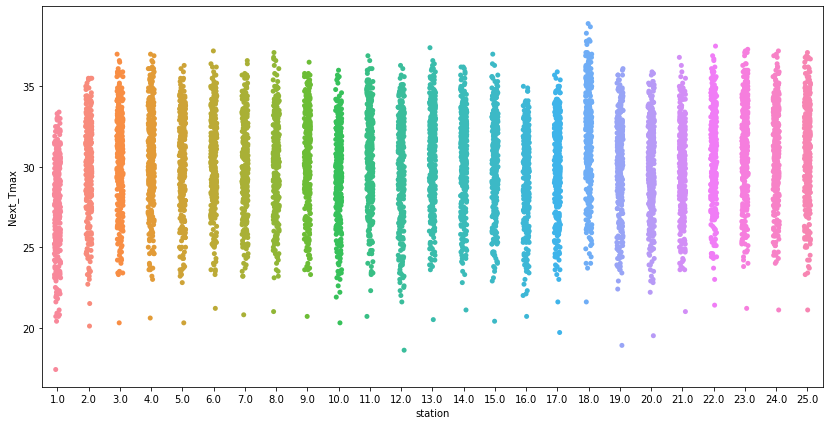

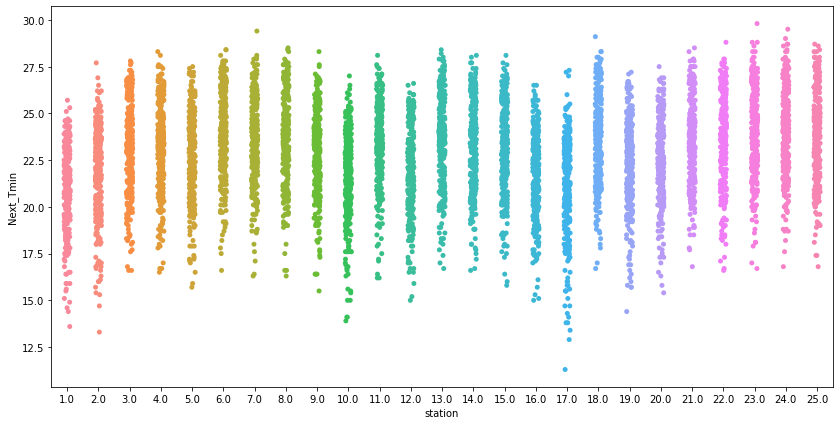

In [45]:
plt.figure(figsize=(14,7))
sns.stripplot(x="station",y="Next_Tmax",data=df)
plt.show()
plt.figure(figsize=(14,7))
sns.stripplot(x="station",y="Next_Tmin",data=df)
plt.show()

- High number of outliers present for all stations.
- Station 18 have the highest minimum and maximum next day air temperatures.

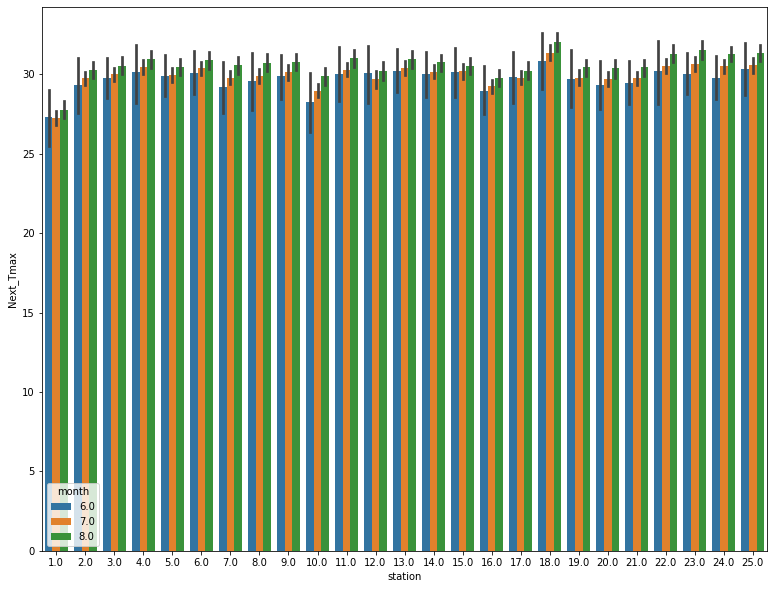

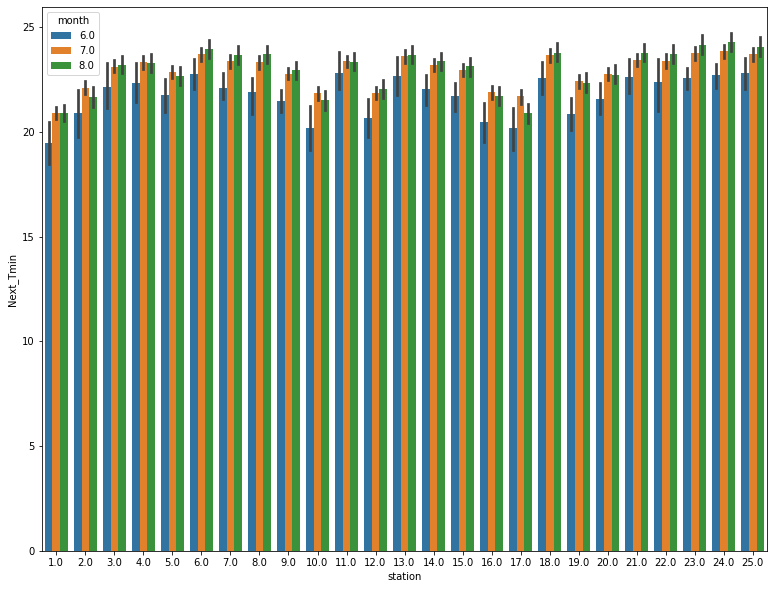

In [62]:
plt.figure(figsize=(13,10))
sns.barplot(df["station"], df["Next_Tmax"],hue=df["month"])
plt.show()

plt.figure(figsize=(13,10))
sns.barplot(df["station"], df["Next_Tmin"],hue=df["month"])
plt.show()

- Next day max air temperatures peaks in august in all weather stations all over seoul with station 18 reporting the highest temperatures in all three months reaffirming what we saw earlier.
- Next day min air temperatures peaks in august in all weather stations all over seoul with station 18,24,25,24 reporting the highest temperatures in all three months reaffirming what we saw earlier.
- This also indicates that Seoul is going through hotter august which is somewhat odd, as usually fall weather crepts in august.

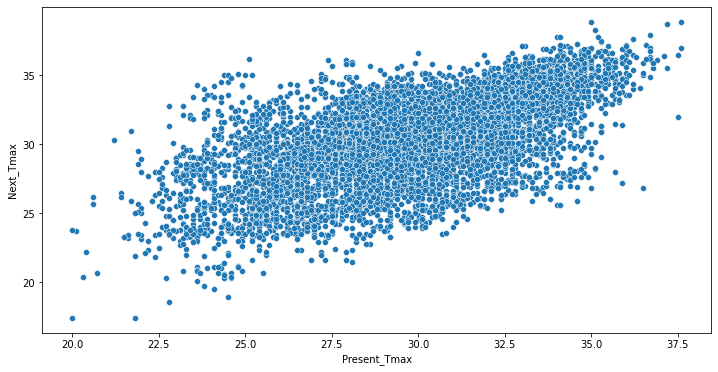

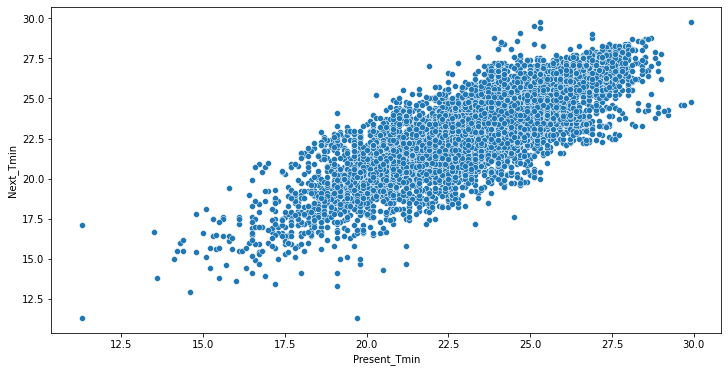

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=df)
plt.show()
plt.figure(figsize=(12,6))
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df)
plt.show()

- Linear relationship between Present day max and min Temperatures and Next day min and max temperatures. 

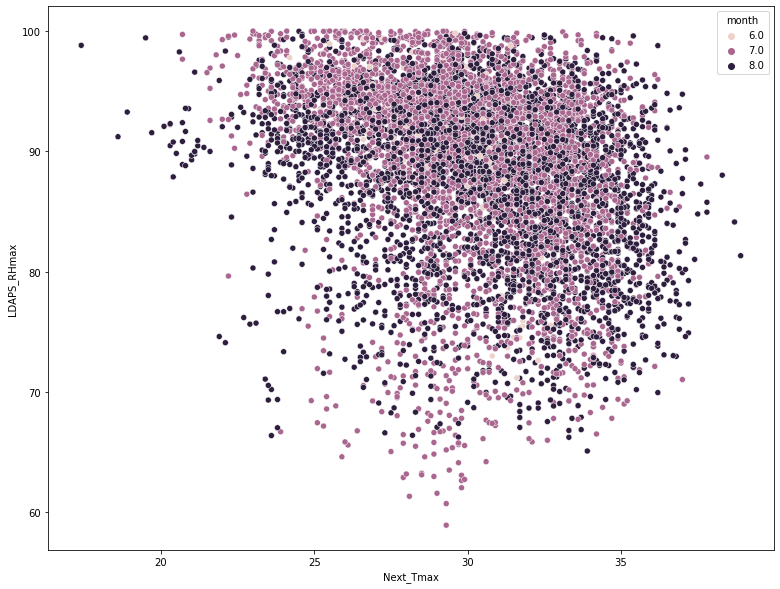

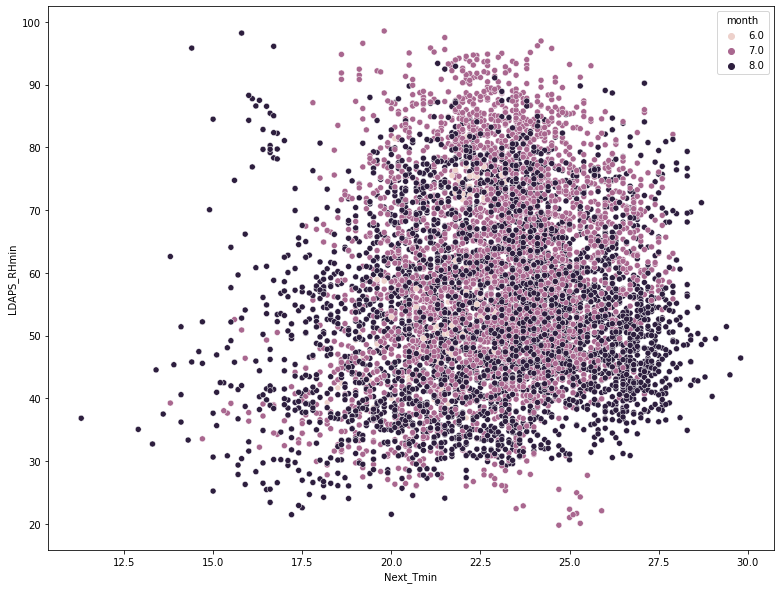

In [69]:
plt.figure(figsize=(13,10))
sns.scatterplot(y=df["LDAPS_RHmax"], x=df["Next_Tmax"],hue=df["month"])
plt.show()

plt.figure(figsize=(13,10))
sns.scatterplot(y=df["LDAPS_RHmin"], x=df["Next_Tmin"],hue=df["month"])
plt.show()

- Data has a lot of outliers.
- month of july next day forecast of max relative humidity stays between 85-100% and next day max temperature ranges from 25 to 35 deg Celcius
- Whereas in August temperature varies the same as July but most days have relative humidity between 75-90% range.
- July saw 20 to 26 deg celcius min temp forecast for the next day when the humidity forecast varied over a large range of 40-90%.
- Min Temperature forecast in August increased to 20-28 deg celcius and the range for humidity decreased a bit to 30-80% 

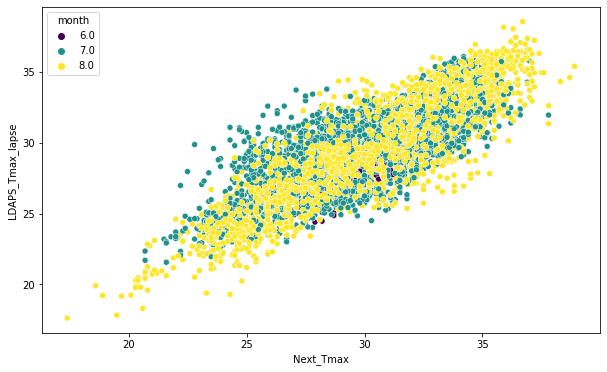

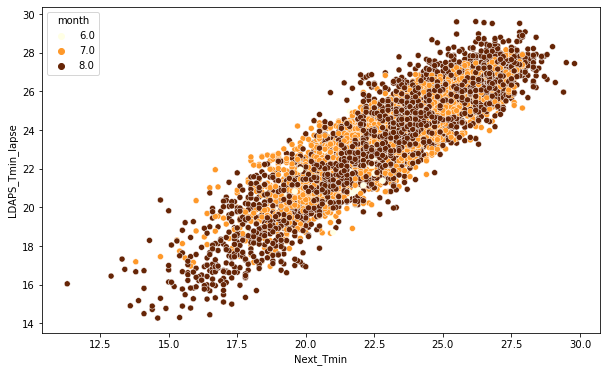

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_Tmax_lapse"], x=df["Next_Tmax"],hue=df["month"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_Tmin_lapse"], x=df["Next_Tmin"],hue=df["month"],palette="YlOrBr")
plt.show()

- Linear relationship between next day min and max temperature forecast with applied lapse temperature forecast

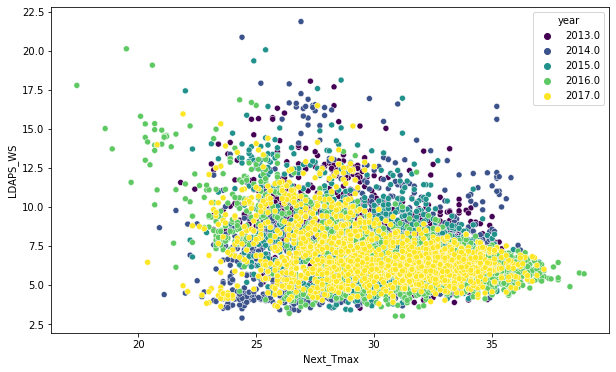

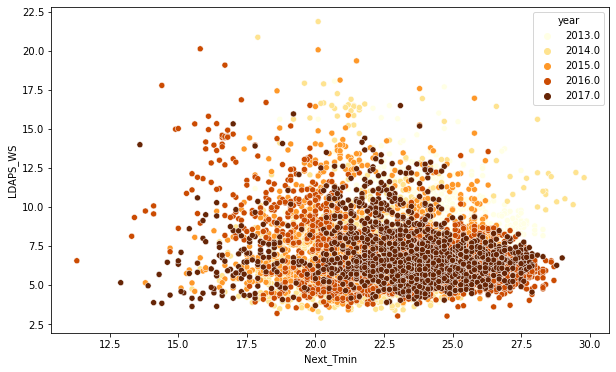

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_WS"], x=df["Next_Tmax"],hue=df["year"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_WS"], x=df["Next_Tmin"],hue=df["year"],palette="YlOrBr")
plt.show()

- 2016 had the most windy forecast compared to other years and the max temperatures forecast were lower as well.
- All the years had most min temperatures forecasted between17.5 to 27.5 deg celcius with wind ranging from 5-13.5 m/s

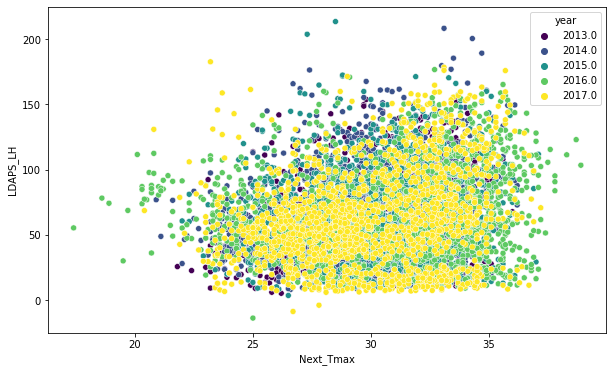

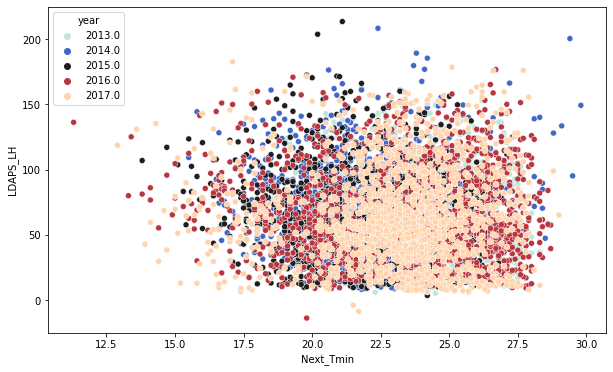

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_LH"], x=df["Next_Tmax"],hue=df["year"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["LDAPS_LH"], x=df["Next_Tmin"],hue=df["year"],palette="icefire")
plt.show()

- No direct relationship between target variables and latent heat flux.

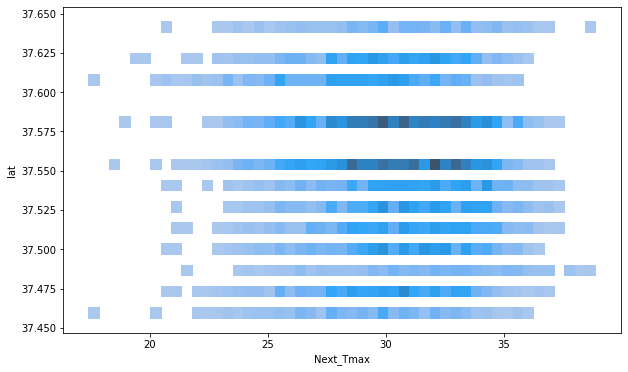

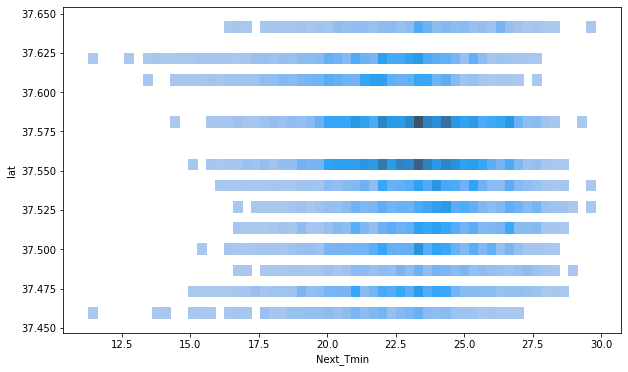

In [127]:
plt.figure(figsize=(10,6))
sns.histplot(y=df["lat"], x=df["Next_Tmax"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(y=df["lat"], x=df["Next_Tmin"],palette="magma")
plt.show()

- Dataset has the most samples of lat=37.575 and next day min temperature ranging from 20-25
- Dataset has the most samples of lat=37.55 and 35.575 and next day max temperature ranging from 25-35

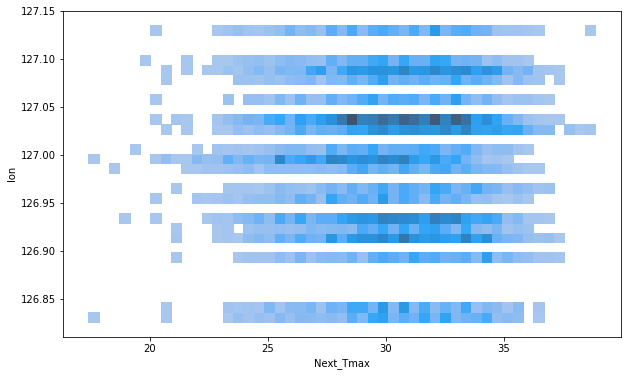

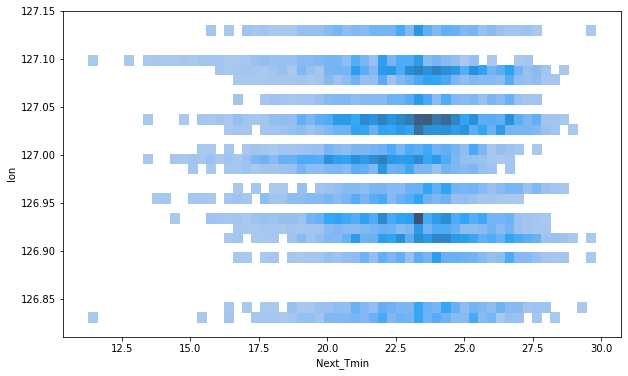

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(y=df["lon"], x=df["Next_Tmax"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(y=df["lon"], x=df["Next_Tmin"],palette="magma")
plt.show()

- Dataset has the most samples of lon=126.9 to 127.1 and next day min temperature ranging from 21-25
- Dataset has the most samples of lon=126.85 and 126.1 and next day max temperature ranging from 27-34

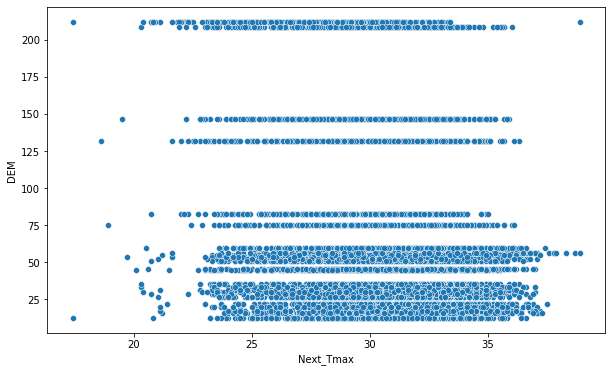

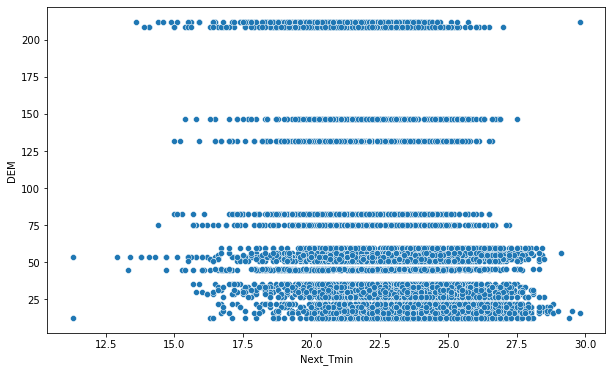

In [135]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["DEM"], x=df["Next_Tmax"],palette="viridis")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(y=df["DEM"], x=df["Next_Tmin"],palette="rocket")
plt.show()

<AxesSubplot:>

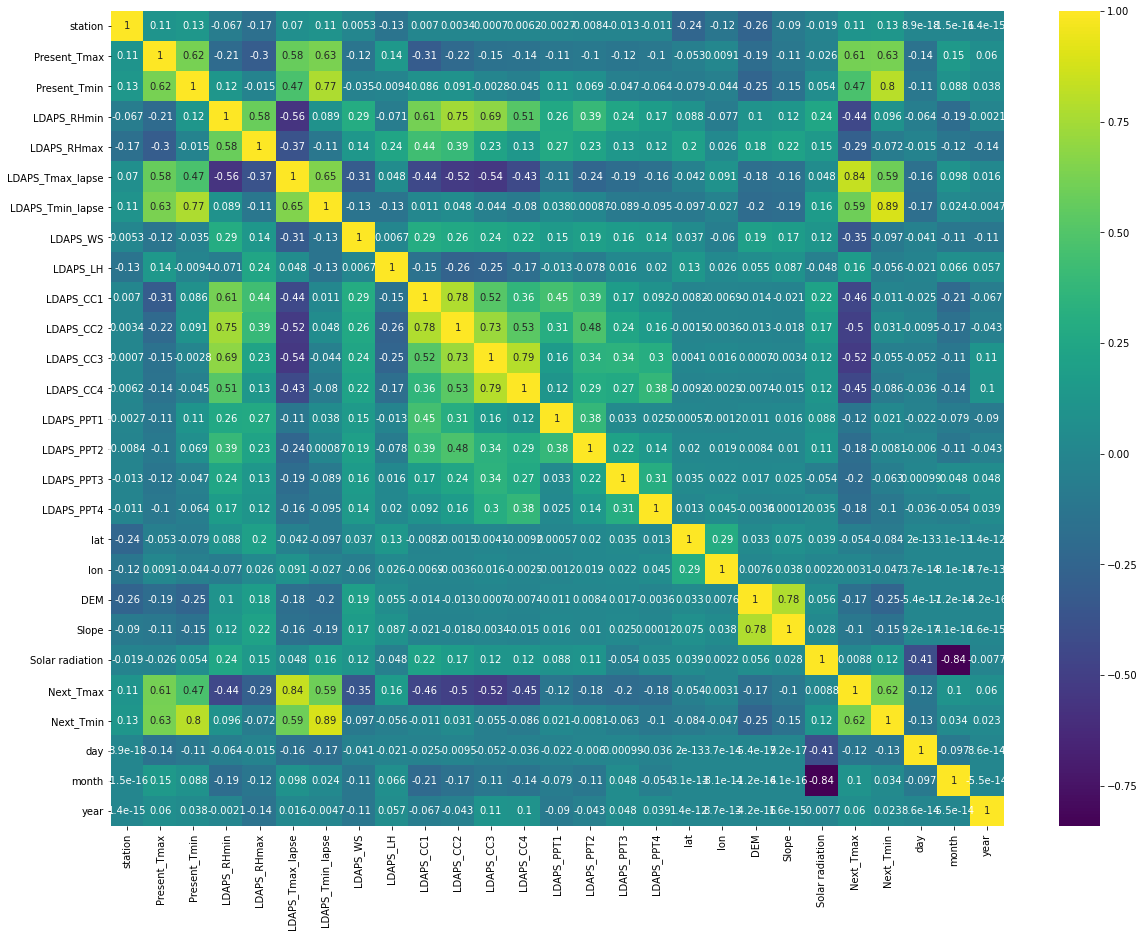

In [136]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

# Data Transformation:

### Null values:

In [138]:
df.isnull().sum().sort_values(ascending=False)

LDAPS_PPT1          75
LDAPS_LH            75
LDAPS_PPT4          75
LDAPS_PPT3          75
LDAPS_PPT2          75
LDAPS_CC4           75
LDAPS_CC3           75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_WS            75
LDAPS_Tmin_lapse    75
LDAPS_Tmax_lapse    75
LDAPS_RHmax         75
LDAPS_RHmin         75
Present_Tmax        70
Present_Tmin        70
Next_Tmax           27
Next_Tmin           27
month                2
day                  2
station              2
year                 2
Solar radiation      0
Slope                0
DEM                  0
lon                  0
lat                  0
dtype: int64

In [139]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(),inplace=True)

In [140]:
df.isnull().sum()

station             0
LDAPS_PPT2          0
month               0
day                 0
Next_Tmin           0
Next_Tmax           0
Solar radiation     0
Slope               0
DEM                 0
lon                 0
lat                 0
LDAPS_PPT4          0
LDAPS_PPT3          0
LDAPS_PPT1          0
Present_Tmax        0
LDAPS_CC4           0
LDAPS_CC3           0
LDAPS_CC2           0
LDAPS_CC1           0
LDAPS_LH            0
LDAPS_WS            0
LDAPS_Tmin_lapse    0
LDAPS_Tmax_lapse    0
LDAPS_RHmax         0
LDAPS_RHmin         0
Present_Tmin        0
year                0
dtype: int64

__We've successfully imputed all the missing values with the mean of their respcective column__

In [142]:
df.shape

(7752, 27)

### Checking Outliers:

In [149]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [150]:
df_new.shape,df.shape

((6894, 27), (7752, 27))

In [151]:
#Data Loss %:
(7752-6894) / 7752 *100 

11.06811145510836

## Splitting the dataset:

In [162]:
x=df_new.drop(["Next_Tmax","Next_Tmin"],axis=1,inplace=False)
y1=df_new["Next_Tmax"]
y2 =df_new["Next_Tmin"]

## Checking Skewness:

We only remove skewness in the input columns and never on the target features.

In [163]:
x.skew()

station             0.002792
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
day                 0.001007
month              -0.192910
year                0.010998
dtype: float64

In [167]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
df_sk=pd.DataFrame(x_new,columns=x.columns)
df_sk.skew()

station            -0.201793
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098609
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
day                -0.212762
month              -0.096583
year                0.000000
dtype: float64

__We've successfully reduced the skewness to make it closer to the standard value.__

### Scaling:

In [166]:
sc=StandardScaler()

In [168]:
xs=sc.fit_transform(df_sk)

# Prediction for Next_Tmax

## Best Random State:

In [170]:
for i in range(0,1000):
    X_train,X_test,y_train,y_test=train_test_split(xs,y1,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
        print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
        print("\n")

At random state 9,the training accuracy is:- 0.7480209909118027
At random state 9,the testing accuracy is:- 0.7481169125024371


At random state 29,the training accuracy is:- 0.7477576357467148
At random state 29,the testing accuracy is:- 0.7479985830844189


At random state 41,the training accuracy is:- 0.7480002315993102
At random state 41,the testing accuracy is:- 0.7476869682789139


At random state 83,the training accuracy is:- 0.7478980575750671
At random state 83,the testing accuracy is:- 0.747604410883556


At random state 85,the training accuracy is:- 0.7479706658703207
At random state 85,the testing accuracy is:- 0.7482485502653177


At random state 142,the training accuracy is:- 0.7479629047443054
At random state 142,the testing accuracy is:- 0.7475542588889486


At random state 148,the training accuracy is:- 0.7480059211428542
At random state 148,the testing accuracy is:- 0.7475965003169529


At random state 186,the training accuracy is:- 0.7479356462266502
At random state 

- At random state 819,the training accuracy is:- 0.7478276339558805
- At random state 819,the testing accuracy is:- 0.7484916549584186


In [171]:
x_train, x_test,y_train, y_test=train_test_split(xs,y1,test_size=.25,random_state=891)

## Model 1 : Decision Tree Regressor

In [172]:
dt_reg_params = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "min_samples_split": [10, 20, 15],
              "max_depth": [5, 8, 11],
              "min_samples_leaf": [60, 40, 100],
              "max_leaf_nodes": [5,10,15]
              }
grid_dt_reg = GridSearchCV(DecisionTreeRegressor(), dt_reg_params)
grid_dt_reg.fit(x_train, y_train)

dt_reg = grid_dt_reg.best_estimator_
print("Best Estimators for Decision Tree Regression: ", grid_dt_reg.best_params_)
print("best r2 score: ",grid_dt_reg.best_score_)
print("------------------------------------------")

Best Estimators for Decision Tree Regression:  {'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 40, 'min_samples_split': 10}
best r2 score:  0.6982142495313084
------------------------------------------


In [173]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth= 5, max_leaf_nodes= 15, min_samples_leaf= 40, min_samples_split= 10)
dtr.fit(x_train, y_train)
pred_dtr= dtr.predict(x_test)

In [174]:
dtrr2 = r2_score(y_test,pred_dtr)

for k in range(2,10):
    dtrscore=cross_val_score(dtr,xs,y1,cv=k)
    dtrcv=dtrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtrcv*100)
    print("r2 score is : ",dtrr2*100)
    print("\n")

At cv=  2
Cross Val score :  54.82895677582349
r2 score is :  68.4956891318711


At cv=  3
Cross Val score :  61.20100712824071
r2 score is :  68.4956891318711


At cv=  4
Cross Val score :  58.99391908656033
r2 score is :  68.4956891318711


At cv=  5
Cross Val score :  57.22497587313956
r2 score is :  68.4956891318711


At cv=  6
Cross Val score :  56.41306139207812
r2 score is :  68.4956891318711


At cv=  7
Cross Val score :  56.92059512005711
r2 score is :  68.4956891318711


At cv=  8
Cross Val score :  55.780512705850605
r2 score is :  68.4956891318711


At cv=  9
Cross Val score :  48.536621809134964
r2 score is :  68.4956891318711




At cv=  3
- Cross Val score :  61.20100712824071
- r2 score is :  68.4956891318711

In [175]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtr))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

MAE: 1.2638984885899893
MSE: 2.683537464652494
RMSE: 1.638150623310474


Text(0, 0.5, 'Y Pred')

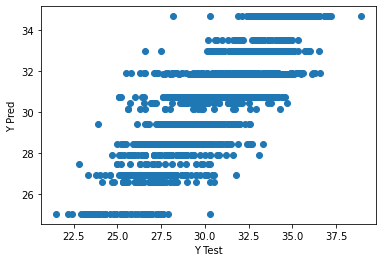

In [176]:
plt.scatter(x=y_test,y=pred_dtr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Model 2: Random Forest Regressor

In [178]:
rf_reg_params =  { 'max_depth': [5,7,10,15,18], "criterion": ["squared_error", "absolute_error", "poisson"],
                  'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [250,150,200,300,350]}
rand_rf_reg = RandomizedSearchCV(RandomForestRegressor(), rf_reg_params)

rand_rf_reg.fit(x_train, y_train)

rf_reg = rand_rf_reg.best_estimator_
# print(rf_reg)
print("Best Estimators for Random Forest Regression: ", rand_rf_reg.best_params_)
print("best r2 score: ",rand_rf_reg.best_score_)
print("------------------------------------------")

Best Estimators for Random Forest Regression:  {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'poisson'}
best r2 score:  0.13687069274254254
------------------------------------------


In [179]:
rfr = RandomForestRegressor(criterion='poisson', max_depth= 10, max_features="log2",n_estimators=200)
rfr.fit(x_train, y_train)
pred_rfr= rfr.predict(x_test)

In [181]:
rfrr2 = r2_score(y_test,pred_dtr)

for k in range(2,8):
    rfrscore=cross_val_score(rfr,xs,y1,cv=k)
    rfrcv=rfrscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rfrcv*100)
    print("r2 score is : ",rfrr2*100)
    print("\n")

At cv=  2
Cross Val score :  8.260433063973377
r2 score is :  68.4956891318711


At cv=  3
Cross Val score :  9.778873136182636
r2 score is :  68.4956891318711


At cv=  4
Cross Val score :  3.850619970158553
r2 score is :  68.4956891318711


At cv=  5
Cross Val score :  6.004686112282962
r2 score is :  68.4956891318711


At cv=  6
Cross Val score :  2.748016933696982
r2 score is :  68.4956891318711


At cv=  7
Cross Val score :  1.772068288086261
r2 score is :  68.4956891318711




At cv=  5
- Cross Val score :  6.004686112282962
- r2 score is :  68.4956891318711

In [182]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

MAE: 2.2650714484641195
MSE: 7.622485683678165
RMSE: 2.7608849457516635


Text(0, 0.5, 'Y Pred')

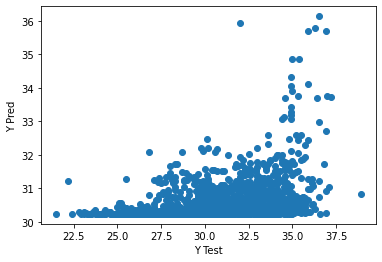

In [183]:
plt.scatter(x=y_test,y=pred_rfr)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

## Prediction for Next_Tmin

### Best Random State:

In [185]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(xs,y2,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
        print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
        print("\n")

At random state 0,the training accuracy is:- 0.8117040124686611
At random state 0,the testing accuracy is:- 0.8121598750959296


At random state 9,the training accuracy is:- 0.811677319418085
At random state 9,the testing accuracy is:- 0.8124378441522375


At random state 62,the training accuracy is:- 0.8118161607819123
At random state 62,the testing accuracy is:- 0.8117718421758413


At random state 77,the training accuracy is:- 0.8117842431414242
At random state 77,the testing accuracy is:- 0.8115576490924323




At random state 9,the training accuracy is:- 0.811677319418085

At random state 9,the testing accuracy is:- 0.8124378441522375

In [186]:
x_train, x_test,y_train, y_test=train_test_split(xs,y2,test_size=.25,random_state=9)

## Model 3: Lasso Regression

In [189]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [192]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [193]:
lss = r2_score(y_test,pred_ls)

for k in range(2,10):
    lsscore=cross_val_score(ls,xs,y2,cv=k)
    lrcv=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lrcv*100)
    print("r2 score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  78.53995806086002
r2 score is :  81.188865178375


At cv=  3
Cross Val score :  75.05022191150246
r2 score is :  81.188865178375


At cv=  4
Cross Val score :  76.96334901649989
r2 score is :  81.188865178375


At cv=  5
Cross Val score :  75.49901323620888
r2 score is :  81.188865178375


At cv=  6
Cross Val score :  72.89201948895943
r2 score is :  81.188865178375


At cv=  7
Cross Val score :  74.34510186580562
r2 score is :  81.188865178375


At cv=  8
Cross Val score :  75.75745235231899
r2 score is :  81.188865178375


At cv=  9
Cross Val score :  67.01460980439937
r2 score is :  81.188865178375




At cv=  2
- Cross Val score :  78.53995806086002
- r2 score is :  81.188865178375

In [194]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_ls))
print('MSE:', metrics.mean_squared_error(y_test, pred_ls))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ls)))

MAE: 0.7840062897309792
MSE: 1.0423806019518715
RMSE: 1.0209704216831512


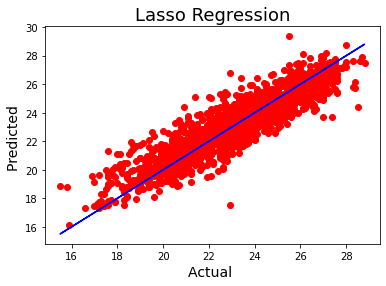

In [195]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_ls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

## Model 4: K-Nearest Neighbours

In [198]:
from sklearn.neighbors import KNeighborsRegressor
parameters = {"n_neighbors":range(2,32,4),"weights":['uniform', 'distance'], "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}
knn=KNeighborsRegressor()
clf = RandomizedSearchCV(knn,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'weights': 'distance', 'n_neighbors': 14, 'algorithm': 'kd_tree'}


In [199]:
knn = KNeighborsRegressor(weights="distance",n_neighbors=14,algorithm="kd_tree")
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn = knn.predict(x_test)

In [200]:
knnr2 = r2_score(y_test,pred_knn)

for k in range(2,10):
    knnscore=cross_val_score(knn,xs,y2,cv=k)
    knncv=knnscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",knncv*100)
    print("r2 score is : ",knnr2*100)
    print("\n")

At cv=  2
Cross Val score :  57.157240861933026
r2 score is :  85.34837547025576


At cv=  3
Cross Val score :  54.52416706160651
r2 score is :  85.34837547025576


At cv=  4
Cross Val score :  59.89996207334113
r2 score is :  85.34837547025576


At cv=  5
Cross Val score :  59.01273138185393
r2 score is :  85.34837547025576


At cv=  6
Cross Val score :  55.10630427409827
r2 score is :  85.34837547025576


At cv=  7
Cross Val score :  57.55239045260161
r2 score is :  85.34837547025576


At cv=  8
Cross Val score :  60.949404644591176
r2 score is :  85.34837547025576


At cv=  9
Cross Val score :  45.66183453591117
r2 score is :  85.34837547025576




At cv=  8
- Cross Val score :  60.949404644591176
- r2 score is :  85.34837547025576

In [201]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

MAE: 0.6997250252735913
MSE: 0.8118898376790372
RMSE: 0.90104929814025


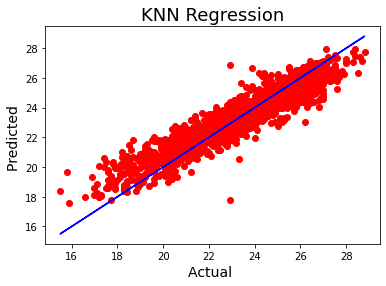

In [206]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test, y=pred_knn, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('KNN Regression',fontsize=18)
plt.show()

## Conclusion:

__For Next_Tmax:__

We can see that Decision Tree Regressor performs the best with 68.5% r2 score.

__For Next_Tmin:__

We will choose Lasso Regression over Knn even though RMSE of Knn is lower, because Lasso had a quick runtime and the cross val score and r2 score are very close to each other.
At cv=  2
- Cross Val score :  78.53995806086002
- r2 score is :  81.188865178375

## Saving the file:

In [207]:
filename = "Temperature_pred_tmin.pkl"
pickle.dump(ls,open(filename,'wb'))

In [208]:
filename = "Temperature_pred_tmax.pkl"
pickle.dump(dtr,open(filename,'wb'))

In [209]:
h = np.array(y_test)
predicted = np.array(pred_ls)
df_comp = pd.DataFrame({"original":h, "predicted":predicted},index=range(len(h)))
df_comp

,original,predicted
0,26.7,25.092439
1,21.3,21.407026
2,23.0,22.659144
3,20.5,20.859566
4,23.2,22.737536
...,...,...
1719,23.0,22.920535
1720,27.1,28.198308
1721,24.9,24.057996
1722,23.5,22.734093


This is for the latest y_test which we extracted from y2, which had Next_Tmin